In [11]:
from utils.read_data import read_data
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian
from spn.algorithms.LearningWrappers import learn_parametric
from spn.algorithms.MPE import mpe
from spn.structure.Base import Context
from spn.io.Graphics import plot_spn
import matplotlib.pyplot as plt

In [2]:
data = read_data()
train_data = data.dropna() # TODO: needs to be updated
train_data = train_data.to_numpy()

In [3]:
context = Context(
    parametric_types=[
        Gaussian,
        Gaussian,
        Gaussian,
        Gaussian,
        Gaussian,
        Gaussian,
        Gaussian,
        Categorical,
        Categorical,
        Categorical,
        Categorical,
        Categorical,
        Categorical,
        Categorical,
        Categorical,
        Gaussian,
        Gaussian,
        Gaussian,
        ]
    ).add_domains(train_data)

/usr/local/lib/python3.9/site-packages/spn/structure/Base.py:162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.domains = np.asanyarray(domain)


In [4]:
spn_model = learn_parametric(
    train_data,
    context,
    min_instances_slice=1000
)

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


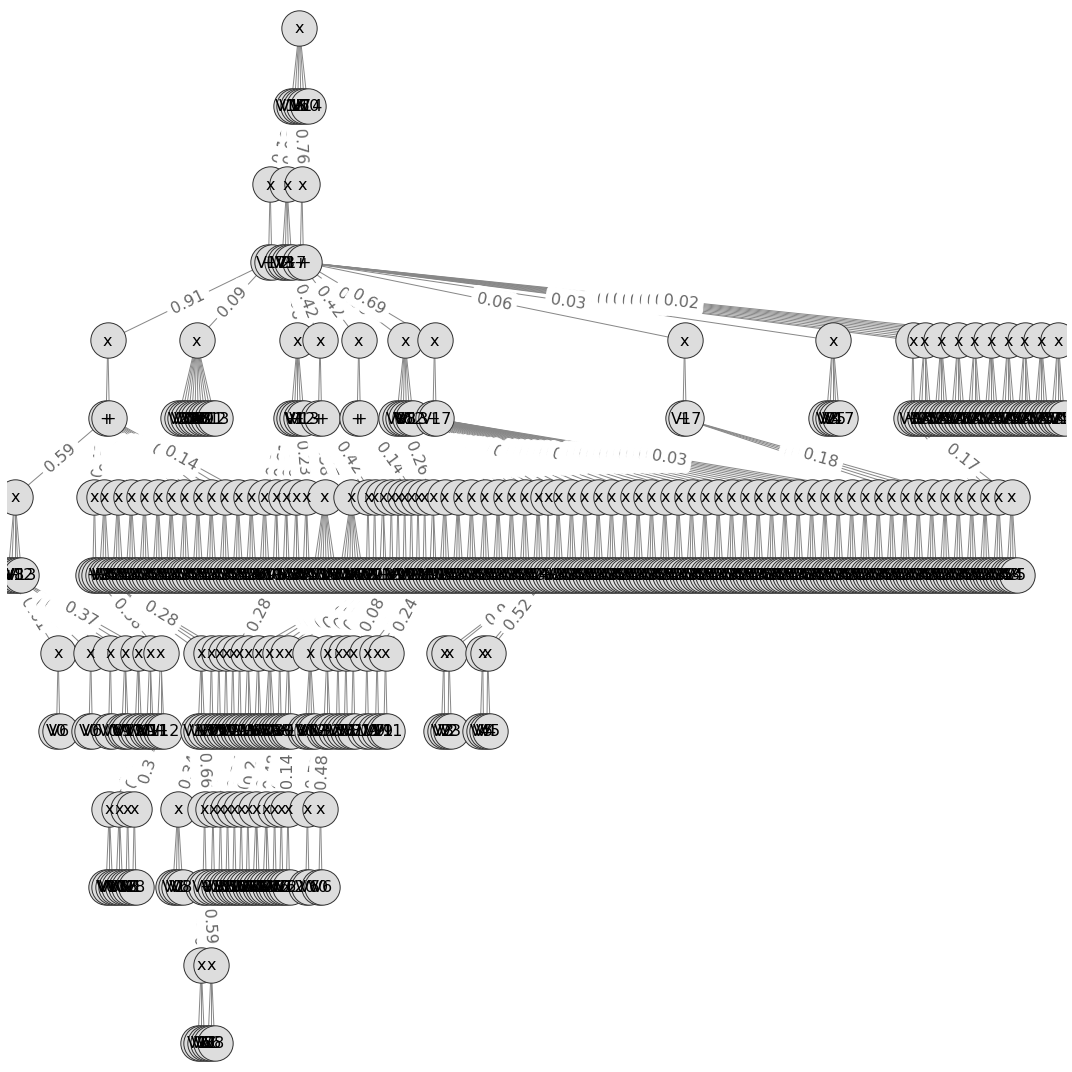

In [5]:
plt.figure(figsize=(15, 15))
plot_spn(spn_model, 'after.png')
plt.show()

In [6]:
from spn.algorithms.Marginalization import marginalize
import numpy as np
from spn.algorithms.Inference import log_likelihood


def calculate_conditional_linspace(spn, conditional_idx, data_point, _min, _max, n_samples=100000):
    """
    returns the linspace x and the probability of spn(conditional_idx | rest) over the linspace
    """
    x = np.linspace(_min, _max, n_samples)
    
    joint_input = np.tile(data_point, (n_samples, 1))
    joint_input[:, conditional_idx] = x
    
    joint_p = log_likelihood(spn, joint_input)
    
    marginal_input = joint_input
    marginal_input[:, conditional_idx] = np.nan
    
    marginal_p = log_likelihood(spn, marginal_input)
    
    p = np.exp(joint_p - marginal_p).flatten()
    return x, p

In [25]:
def p_between(_min, _max, x, p, real_value=None, pred_value=None):
    #Print the curve
    plt.plot(x, p)
    where = (x > _min) & (x < _max)
    #Fill under the curve
    plt.fill_between(
            x=x, 
            y1=p, 
            where=where,
            color= "b",
            alpha= 0.2)
    
    _p = p[(x > _min) & (x < _max)].sum() / p.sum()
    plt.title(f"P({_min} <= delivery in min <= {_max})) = {_p:.4f}")
    if real_value:
        plt.scatter([real_value], [0], marker="x", color="red", label="real")
    if pred_value:
        plt.scatter([pred_value], [0], marker="x", color="green", label="mpe")
    plt.legend()
    plt.show()

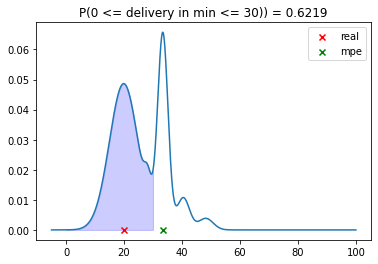

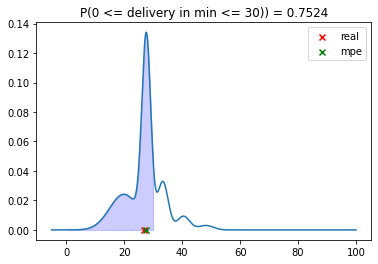

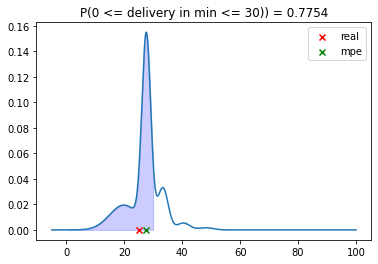

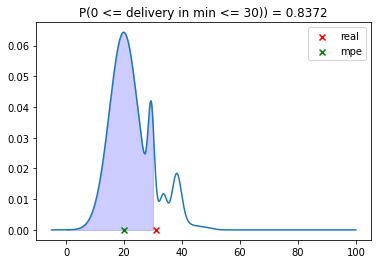

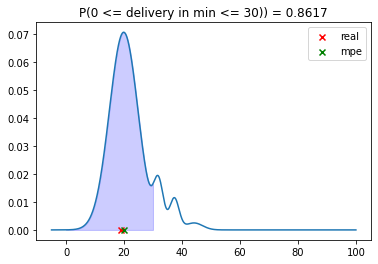

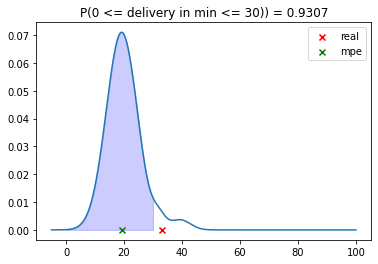

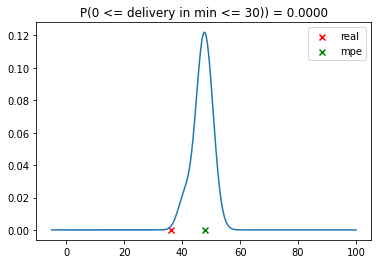

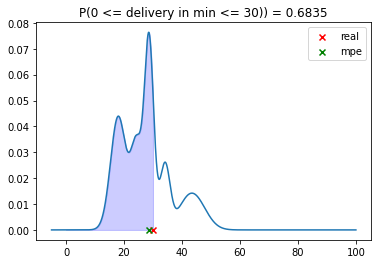

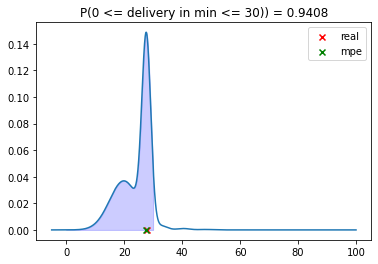

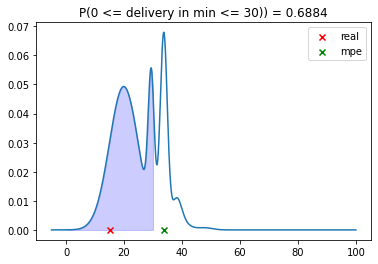

In [27]:
for i in np.random.randint(0, 1000, 10):
    data_point = train_data[i].copy()
    x, p = calculate_conditional_linspace(spn_model, 6, data_point, -5, 100, n_samples=10000)
    real_value = data_point[6]
    data_point[6] = np.nan
    pred = mpe(spn_model, [data_point]).flatten()
    p_between(0, 30, x, p, real_value=real_value, pred_value=pred[6])